In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import os, sys
import glob
import yaml
import random
import argparse
import numpy as np

os.chdir('../..')
parent_dir = os.path.abspath(os.getcwd())

from src.utils.train_utils import *
from src.utils.input_utils import transform_input, Hdf5Cacher
from src.utils.data_utils import RawStateDataset

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D


matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

def set_style():
    sns.set(font='serif', font_scale=1.4)
   
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

matplotlib.rcParams.update({'font.size': 24})
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24
fontsize = 25

set_style()

In [ ]:
strats = ["random", "max", "min", "confusion", "all", "confrand"]
concepts = ["above180", "above45", "abovebb", "near", "upright"]

for concept in concepts:
    for strat in strats:
        data_path = parent_dir + "/data/g_shapenet/" + concept
        data_filename = data_path+"/{}_gt_data.hdf5".format(strat)
        label_filename = data_path+"/{}_gt_label.hdf5".format(strat)
        train_set = RawStateDataset(data_filename, label_filename)
        zeros = 0
        ones = 0
        for (data, label) in train_set:
            if label == 0.0:
                zeros += 1
            else:
                ones += 1
        print("Concept {}, strat {}: {} zeros and {} ones.\n".format(concept, strat, zeros, ones))

Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples


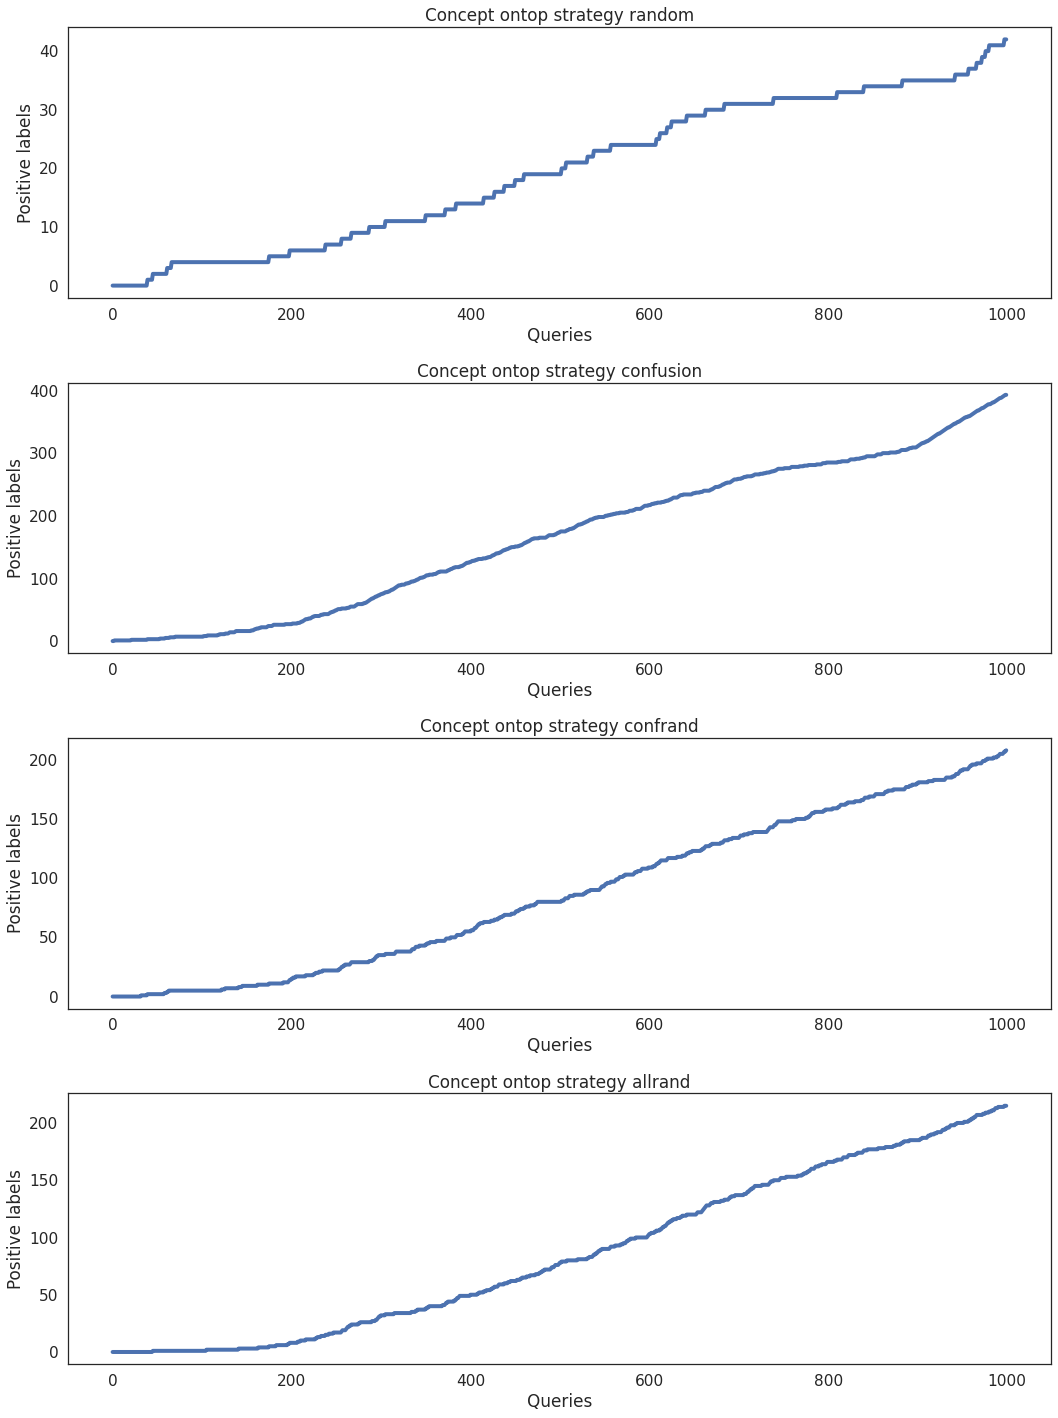

Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples


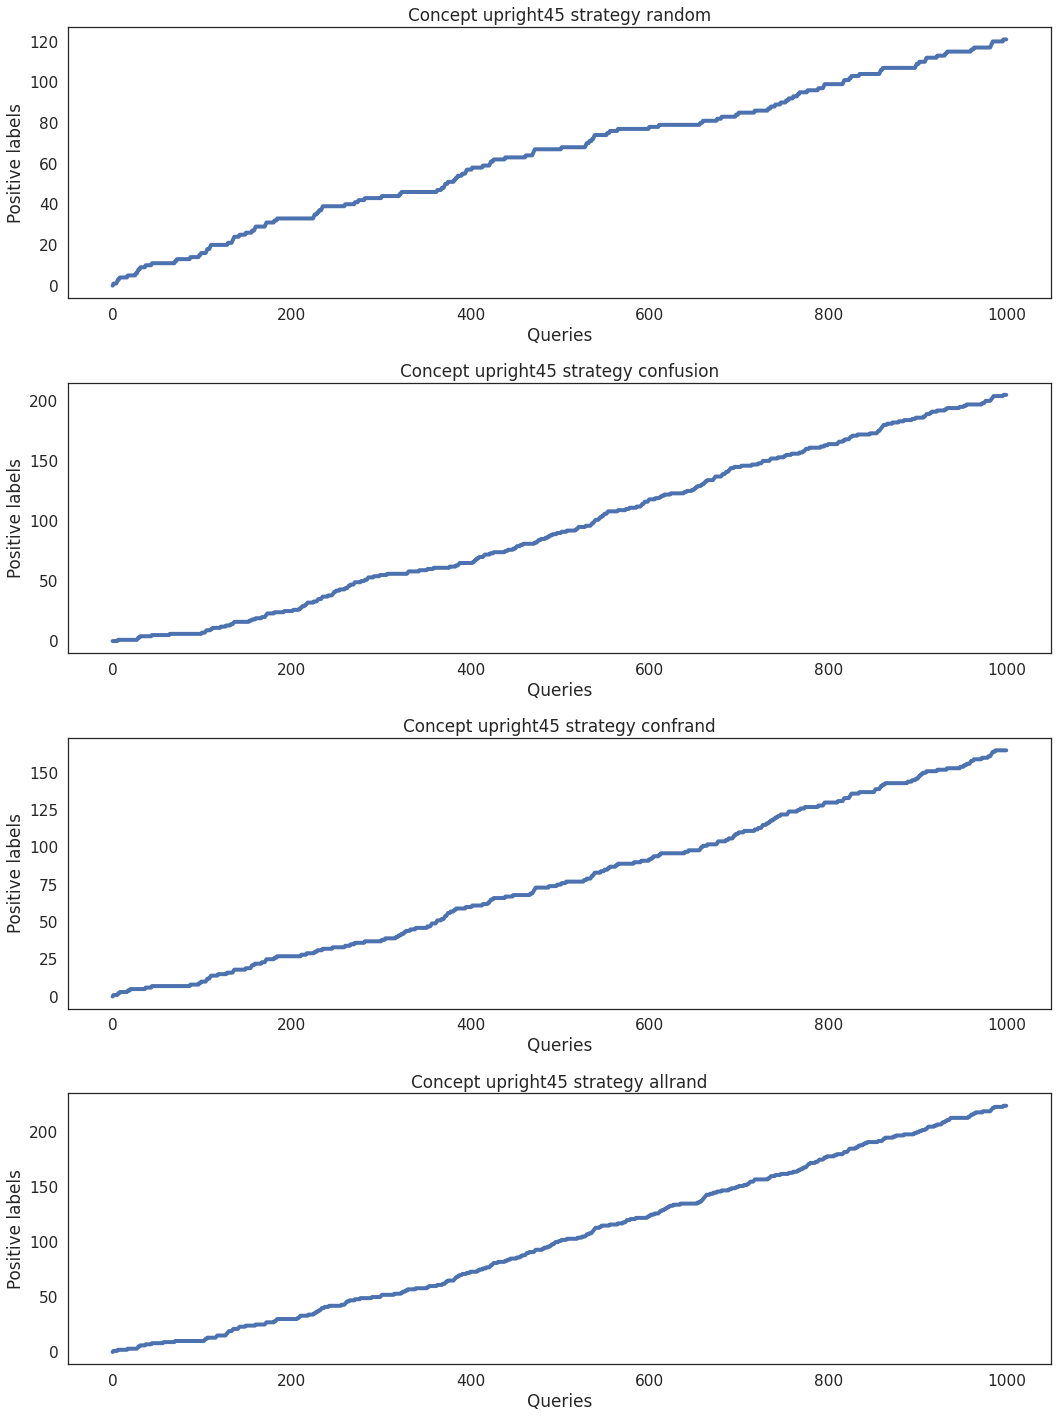

Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples
Loading dataset with 1000 examples


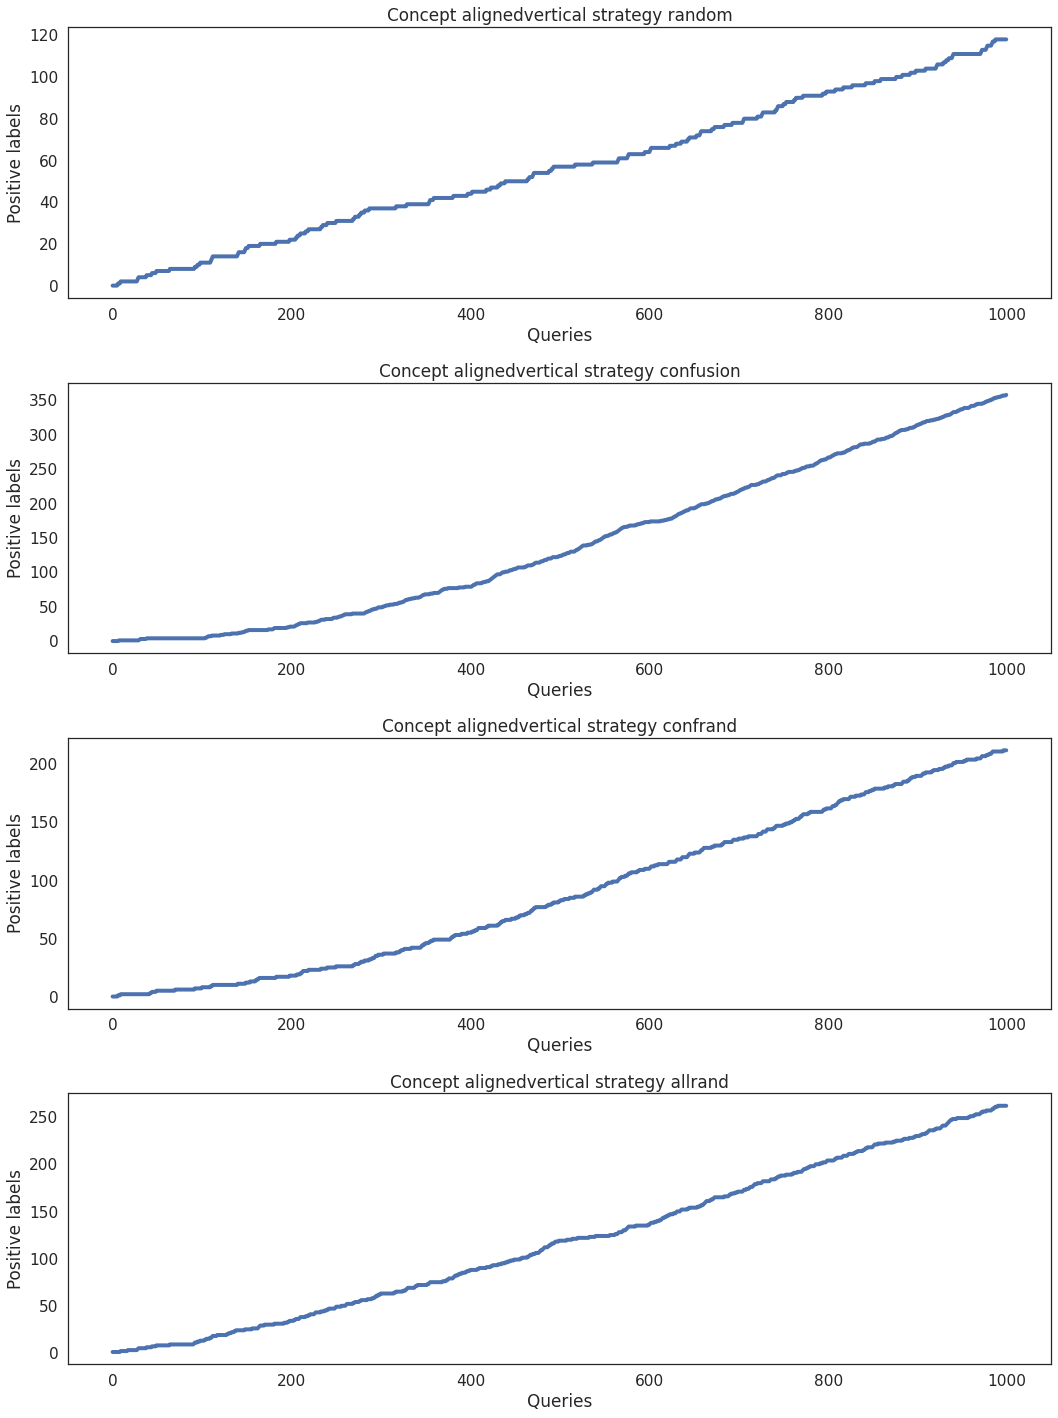

In [19]:
strats = ["random", "confusion", "confrand", "allrand"]
concepts = ["ontop", "upright45", "alignedvertical"]

for concept in concepts:
    fig, axs = plt.subplots(len(strats), figsize=(15,20))
    for i, strat in enumerate(strats):
        data_path = parent_dir + "/data/g_shapenet/" + concept
        data_filename = data_path+"/{}gt_mining0_data.hdf5".format(strat)
        label_filename = data_path+"/{}gt_mining0_label.hdf5".format(strat)
        train_set = RawStateDataset(data_filename, label_filename)
        
        # Sort the trainset.
        idxes = []
        for j, (data, label) in enumerate(train_set):
            idx = train_set.examples[j].split("_")[0]
            idxes.append(int(idx))
        idxes = np.argsort(idxes)

        one = 0
        ones = []
        for idx in idxes:
            _, label = train_set[idx]
            if label == 1.0:
                one += 1
            ones.append(one)
        axs[i].plot(ones, linewidth=4.0)
        axs[i].set_xlabel("Queries")
        axs[i].set_ylabel("Positive labels")
        axs[i].set_title("Concept {} strategy {}".format(concept, strat))
    fig.tight_layout()
    plt.show()
